In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import csv
import json

Задание 1

In [3]:
file_id = '1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1'

url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)

In [4]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Задание 2


In [8]:
#Рассчитаем базовые статистики для  количественных данных
selected_columns = [
'satisfaction_level',	'last_evaluation','number_project',	'average_montly_hours',	'time_spend_company']
subset_df = df[selected_columns]

basic_statistics = round(subset_df.describe(), 2)
print("Базовые статистики:")
print(basic_statistics)

Базовые статистики:
       satisfaction_level  last_evaluation  number_project  \
count            14999.00         14999.00        14999.00   
mean                 0.61             0.72            3.80   
std                  0.25             0.17            1.23   
min                  0.09             0.36            2.00   
25%                  0.44             0.56            3.00   
50%                  0.64             0.72            4.00   
75%                  0.82             0.87            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  
count              14999.00            14999.00  
mean                 201.05                3.50  
std                   49.94                1.46  
min                   96.00                2.00  
25%                  156.00                3.00  
50%                  200.00                3.00  
75%                  245.00                4.00  
max                  

In [9]:
#Рассчитаем базовые статистики для  категориальных данных

def calculate_categorical_statistics(df, columns):
    result = {}

    for column in columns:

        mode_value = df[column].mode().values[0]
        unique_values_count = df[column].nunique()
        value_counts = df[column].value_counts()

        result[column] = {
            'mode': mode_value,
            'unique_values_count': unique_values_count,
            'value_counts': value_counts
        }

    return result


result_statistics = calculate_categorical_statistics(df, ['work_accident', 'left', 'promotion_last_5years', 'department', 'salary'])

for column, stats in result_statistics.items():
    print(f"Столбец: {column}")
    print(f"Мода: {stats['mode']}")
    print(f"Число уникальных значений: {stats['unique_values_count']}")
    print(f"Частота встречаемости каждой категории:\n{stats['value_counts']}\n")


Столбец: work_accident
Мода: 0
Число уникальных значений: 2
Частота встречаемости каждой категории:
0    12830
1     2169
Name: work_accident, dtype: int64

Столбец: left
Мода: 0
Число уникальных значений: 2
Частота встречаемости каждой категории:
0    11428
1     3571
Name: left, dtype: int64

Столбец: promotion_last_5years
Мода: 0
Число уникальных значений: 2
Частота встречаемости каждой категории:
0    14680
1      319
Name: promotion_last_5years, dtype: int64

Столбец: department
Мода: sales
Число уникальных значений: 10
Частота встречаемости каждой категории:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Столбец: salary
Мода: low
Число уникальных значений: 3
Частота встречаемости каждой категории:
low       7316
medium    6446
high      1237
Name: salary, dtype: int64



Задание 3

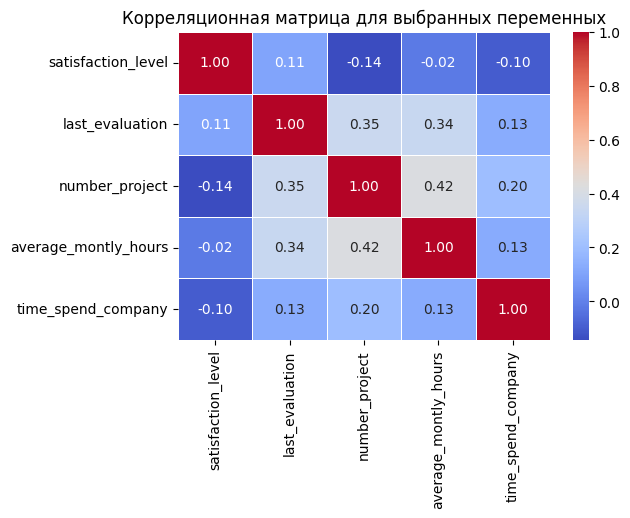

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix_subset = subset_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Корреляционная матрица для выбранных переменных')
plt.show()


Наиболее скоррелированные параметры:'number_project'-	'average_montly_hours (0,42)'и		'last_evaluation'-'number_project'(0,35);
Наименее скоррелированные параметры: 'satisfaction_level'-'number_project'(-0,14) и 'satisfaction_level'-'time_spend_company'(-0,10)

Задание 4

In [11]:
# Рассчитываем количество сотрудников в каждом департаменте
employee_count_by_department = df['department'].value_counts()

print(employee_count_by_department)


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


Задание 5

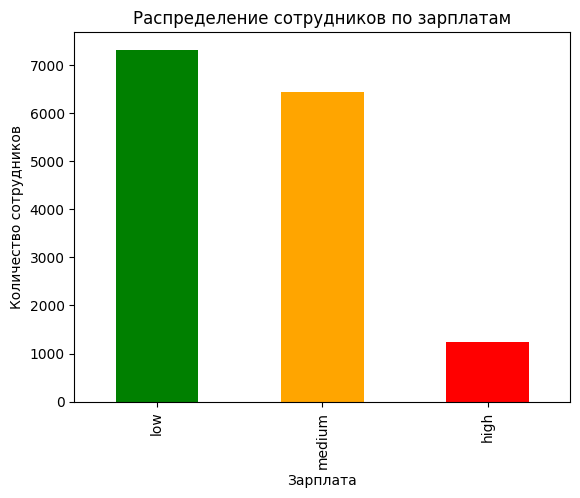

In [12]:
# Группируем данные по зп и рассчитываем кол-во сотрудников в каждой категории
salary_distribution = df['salary'].value_counts()

salary_distribution.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()


Задание 6

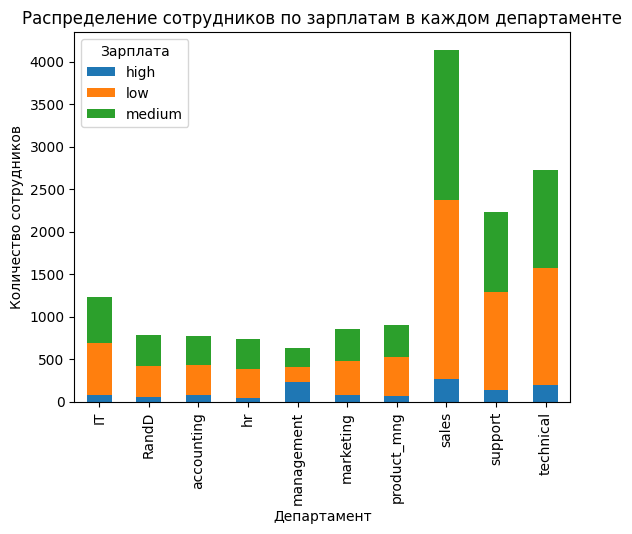

In [13]:
# Группируем данные по департаментам и зп, рассчитываем кол-во сотрудников в каждой категории
salary_distribution_by_department = df.groupby(['department', 'salary']).size().unstack()

salary_distribution_by_department.plot(kind='bar', stacked=True)
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.legend(title='Зарплата')
plt.show()


Задание 7
Проверим гипотезу, что сотрудники с высоким окладом проводят впемени на работе больше, чем сотрудники с низким окладом.

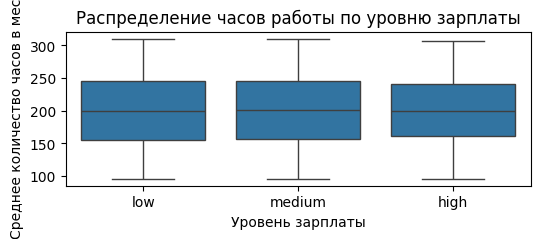

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем ящик с усами для визуализации распределения часов работы по уровню зарплаты
plt.figure(figsize=(6, 2))
sns.boxplot(x='salary', y='average_montly_hours', data=df)
plt.title('Распределение часов работы по уровню зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Среднее количество часов в месяц')
plt.show()


In [15]:
from scipy.stats import ttest_ind

# Формируем данные о сотрудниках с высоким и низким окладами
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

# Проводим t-тест
stat, p = ttest_ind(high_salary_hours, low_salary_hours, equal_var=False)

print(f'T-статистика: {stat}')
print(f'P-значение: {p}')

# Проверяем гипотезу
if p < 0.05:
    print("Отвергаем нулевую гипотезу: есть статистически значимая разница.")
else:
    print("Принимаем нулевую гипотезу: нет статистически значимой разницы.")


T-статистика: -0.7624331665385475
P-значение: 0.4459045542257889
Принимаем нулевую гипотезу: нет статистически значимой разницы.



В данной ситуации статистические тесты и визуализация подтверждают отсутствие статистически значимого различия в среднем времени работы между сотрудниками с высоким и низким окладами.

Задание 8

In [16]:
# Формируем две группы
left_employees = df[df['left'] == 1]  # уволившиеся
stayed_employees = df[df['left'] == 0]  # не уволившиеся

# Доля сотрудников с повышением за последние 5 лет
promotion_left = left_employees['promotion_last_5years'].mean()
promotion_stayed = stayed_employees['promotion_last_5years'].mean()

print(f"Доля сотрудников с повышением за последние 5 лет среди уволившихся: {promotion_left:.2%}")
print(f"Доля сотрудников с повышением за последние 5 лет среди не уволившихся: {promotion_stayed:.2%}")

# Рассчет средней степени удовлетворенности
satisfaction_left = left_employees['satisfaction_level'].mean()
satisfaction_stayed = stayed_employees['satisfaction_level'].mean()

print(f"Средняя степень удовлетворенности среди уволившихся: {satisfaction_left:.2f}")
print(f"Средняя степень удовлетворенности среди не уволившихся: {satisfaction_stayed:.2f}")

# Рассчет среднего количества проектов
average_projects_left = left_employees['number_project'].mean()
average_projects_stayed = stayed_employees['number_project'].mean()

print(f"Среднее количество проектов среди уволившихся: {average_projects_left:.2f}")
print(f"Среднее количество проектов среди не уволившихся: {average_projects_stayed:.2f}")



Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.53%
Доля сотрудников с повышением за последние 5 лет среди не уволившихся: 2.63%
Средняя степень удовлетворенности среди уволившихся: 0.44
Средняя степень удовлетворенности среди не уволившихся: 0.67
Среднее количество проектов среди уволившихся: 3.86
Среднее количество проектов среди не уволившихся: 3.79


In [ ]:
Задание 9

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression

In [69]:
# подготовка данных
#X = df[['satisfaction_level',	'last_evaluation','number_project',	'average_montly_hours',	'time_spend_company',	'work_accident','promotion_last_5years']]
#y = df['left']

In [70]:
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df['left']


In [79]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [80]:

lda = LinearDiscriminantAnalysis()

In [81]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [82]:
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
        -1.10730495e+00]])

In [76]:
lda.intercept_

array([0.15265168])

In [77]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [78]:
# 5. Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Вывод результатов
print(f"Точность модели: {accuracy:.2f}")
print("\nОтчет по классификации:")
print(classification_report_result)
print("\nМатрица ошибок:")
print(confusion_matrix_result)


Точность модели: 0.75

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2853
           1       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750


Матрица ошибок:
[[2605  248]
 [ 676  221]]


Точность модели (Accuracy): 0.75 В целом, модель имеет неплохую общую точность,
 модель правильно классифицировала 75% всех случаев.
 Результаты тестирования показывают высокую вероятность прогнозирвания по оставшимся сотрудникам( 76% выборки) по сравнению с прогнозированием по уволившимся сотрудникам( 24%)


https://colab.research.google.com/drive/1l4mYDgCtaRIIvUi6dSZOusjht7KyNKZA?usp=sharing